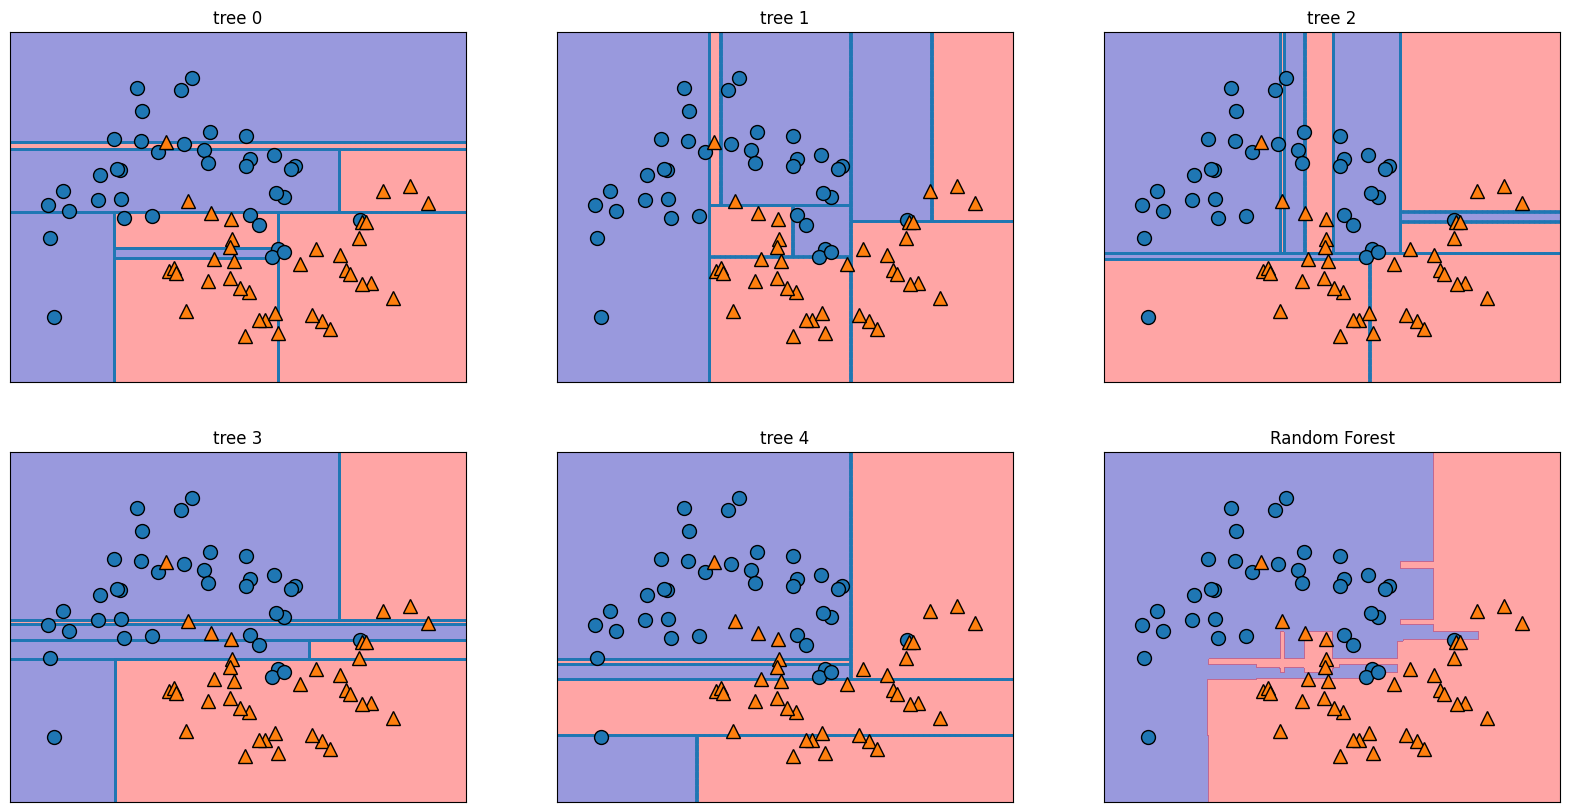

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
import mglearn 
from sklearn.datasets import load_breast_cancer
X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
forest = RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

fig,axes = plt.subplots(2,3,figsize=(20,10))

for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title(f"tree {i}")
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)
mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)



In [17]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
forest = RandomForestClassifier(n_estimators=200,random_state=0)
forest.fit(X_train,y_train)
print(f"Accuracy on training set {forest.score(X_train,y_train)}")
print(f"Accuracy on training set {forest.score(X_test,y_test)}")



Accuracy on training set 1.0
Accuracy on training set 0.972027972027972


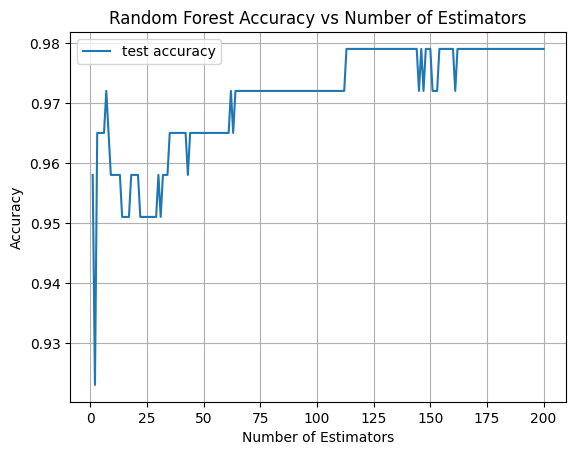

In [16]:
forest_score=[]
for i in range(1,201):
    forest = RandomForestClassifier(n_estimators=i,random_state=42)
    forest.fit(X_train,y_train)
    forest_score.append(forest.score(X_test,y_test))
plt.plot(range(1,201),forest_score,label="test accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Number of Estimators")
plt.legend()
plt.grid(True)
plt.show()
plt.show()
